In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import os 

import sys
import pickle
import time

import Alpaga # the full package
importlib.reload(Alpaga) # to make sure you have the good version
from Alpaga import sshg_module as sshg# The code that actually have the function

from scipy.optimize import curve_fit

In [2]:
Alpaga

<module 'Alpaga' from '/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/__init__.py'>

# Sortie des pickles + recup données

In [3]:
# For the tutorial: 
import Alpaga.Data_tutorial
Dir_tuto_file = os.path.dirname(Alpaga.Data_tutorial.__file__) # where is stored to tutorial files

WORK_DIR = Dir_tuto_file
#recupération intensity pola S

name_save_result = os.path.join(WORK_DIR, 'SSHG/sshg_water_pola_S.p')

with open(name_save_result, "rb") as filetoload:
    L_post_prod_load = pickle.load(filetoload)

L_intensity_S = L_post_prod_load['L_intensity_angle'] #récupération de l'intensité pour chaque angle
L_lambda_0_S = L_post_prod_load['L_lambda_0_angle'] #récupération de la longueur d'onde sur laquelle la gaussienne est centrée pour chaque angle
L_waist_S = L_post_prod_load['L_waist_angle'] #récupération de la largeur à mi-hauteur pour chaque angle


#recupération intensity pola P

#La variable name_save_result doit pointé sur le pickle de la polar P qui nous interesse,
#Exemple de chemin : 'C:\Users\guillaume.alpaga\Desktop\manip\donnees\eau\Pickles\pickle_polarP_eau.p'

name_save_result = os.path.join(WORK_DIR, 'SSHG/sshg_water_pola_P.p')

with open(name_save_result, "rb") as filetoload:
    L_post_prod_load = pickle.load(filetoload)

L_intensity_P = L_post_prod_load['L_intensity_angle'] #récupération de l'intensité pour chaque angle
L_lambda_0_P = L_post_prod_load['L_lambda_0_angle'] #récupération de la longueur d'onde sur laquelle la gaussienne est centrée pour chaque angle
L_waist_P = L_post_prod_load['L_waist_angle'] #récupération de la largeur à mi-hauteur pour chaque angle


#mise en forme des angles

L_files_angles = L_post_prod_load['L_files_angles']

L_files_angles_new = []
for k in range(0, len(L_files_angles), 1):
    L_files_angles_new.append(float(L_files_angles[k]))
L_polarisation_angle = np.array(L_files_angles_new)*2



Text(0.5, 1.0, '$\\omega_0$ fit parameter found for every polarisation angle')

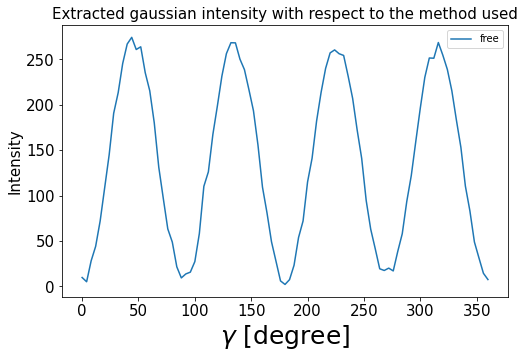

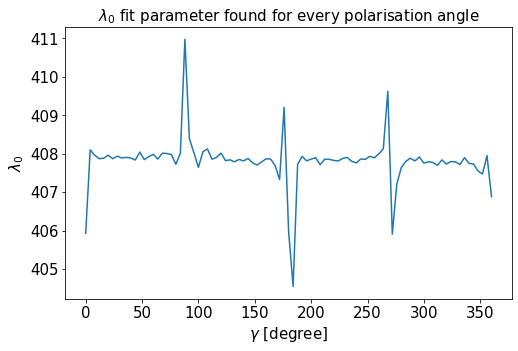

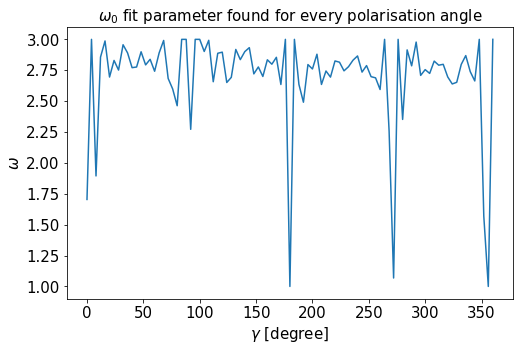

In [4]:
plt.figure(1, figsize=(8, 5))
plt.plot(L_polarisation_angle, L_intensity_S, label='free')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=15)
plt.ylabel(r'Intensity', fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=10)
plt.title('Extracted gaussian intensity with respect to the method used', fontsize=15)

plt.figure(2, figsize=(8, 5))
plt.plot(L_polarisation_angle, L_lambda_0_S)
plt.xlabel(r'$\gamma$ [degree]', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(r'$\lambda_0$', fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'$\lambda_0$ fit parameter found for every polarisation angle', fontsize=15)


plt.figure(3, figsize=(8, 5))
plt.plot(L_polarisation_angle, L_waist_S)
plt.xlabel(r'$\gamma$ [degree]', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(r'$\omega$', fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'$\omega_0$ fit parameter found for every polarisation angle', fontsize=15)

Text(0.5, 1.0, '$\\omega_0$ fit parameter found for every polarisation angle')

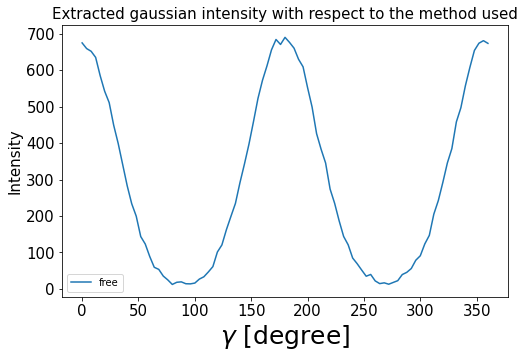

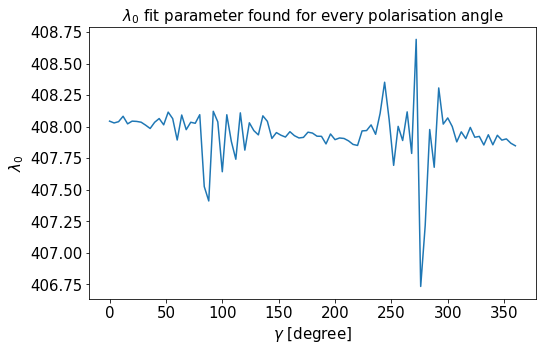

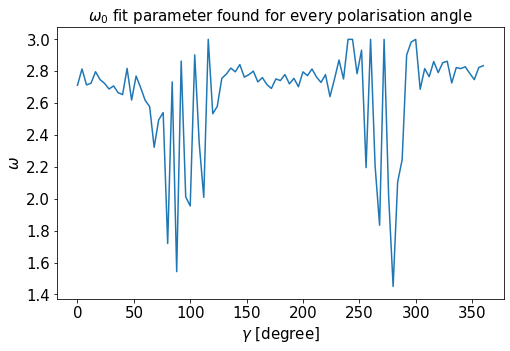

In [5]:
plt.figure(1, figsize=(8, 5))
plt.plot(L_polarisation_angle, L_intensity_P, label='free')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=15)
plt.ylabel(r'Intensity', fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=10)
plt.title('Extracted gaussian intensity with respect to the method used', fontsize=15)

plt.figure(2, figsize=(8, 5))
plt.plot(L_polarisation_angle, L_lambda_0_P)
plt.xlabel(r'$\gamma$ [degree]', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(r'$\lambda_0$', fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'$\lambda_0$ fit parameter found for every polarisation angle', fontsize=15)


plt.figure(3, figsize=(8, 5))
plt.plot(L_polarisation_angle, L_waist_P)
plt.xlabel(r'$\gamma$ [degree]', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(r'$\omega$', fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'$\omega_0$ fit parameter found for every polarisation angle', fontsize=15)

# Analyse

In [6]:
#### Analyse SSHG ####

#valeur expe

#dans notre exemple, nous étudions notre interface en réflexion avec un angle d'incidence de 70°

angle_incidence = 70 #angle d'incidence de votre montage experimental
n1_fonda=1           #indice du premier milieu à la longueur d'onde du fondamental
n2_fonda=1.339       #indice du second milieu à la longueur d'onde du fondamental
n1_harmo=1           #indice du premier milieu à la longueur d'onde harmonique
n2_harmo=1.329       #indice du second milieu à la longueur d'onde harmonique

#vous pouvez obtenir les coefficient ai sans besoin de données à traiter par la fonction :
# ai = coeff(angle_incidence, n1_fonda, n2_fonda, n1_harmo, n2_harmo)

#L_angles in degree

ai, chi = sshg.analyse_polarization_SSHG(angle_incidence, n1_fonda, n2_fonda, n1_harmo, n2_harmo, L_polarisation_angle, L_intensity_S, L_intensity_P, XXZ=False)

# La fonction ci-dessus vous renvoie les coefficient ai (utile pour le fit), ainsi que les valeur de chi trouvée par le fit des données.
# Cette fonction prend en argument les paramètres géometriques vu au dessus, une liste d'angle et une liste d'intensité pour la polar S et la P.

# ATTENTION : le nombre de points experimentaux (éléments de liste) doit être le même pour la liste d'angle, la liste S et la liste P.

# Dans le cas où votre polar S serait plate et bruitée, il est possible de fixé la valeur du paramètre chi_XXZ et de n'ajuster que chi_ZXX et chi_ZZZ.
# Il suffit pour cela de changer le paramètre de fonction XXZ=False (cas où on l'ajuste par des données experimentales) par XXZ=0.1 par exemple. (attention ne pas mettre ce paramètre XXZ=0 : risque d'erreur numérique)



# Résultats

In [7]:
# Les résultats sont dévoilés dans cette cellule
# La fonction renvoie deux sets de paramètre comme suit :

print('Set paramètre 1 :' ,end='\n')
print('chi_XXZ =' ,chi[0] ,end='\n')
print('chi_ZXX =' ,chi[1] ,end='\n')
print('chi_ZZZ =' ,chi[2] ,end='\n')
print('rapport ZXX/XXZ =',chi[1]/chi[0],end='\n')
print('rapport XXZ/ZZZ =',chi[0]/chi[2],end='\n')
print('rapport ZXX/ZZZ =',chi[1]/chi[2],end='\n\n')


print('Set paramètre 2 :' ,end='\n')
print('chi_XXZ =' ,chi[3] ,end='\n')
print('chi_ZXX =' ,chi[4] ,end='\n')
print('chi_ZZZ =' ,chi[5] ,end='\n')
print('rapport ZXX/XXZ =',chi[4]/chi[3],end='\n')
print('rapport XXZ/ZZZ =',chi[3]/chi[5],end='\n')
print('rapport ZXX/ZZZ =',chi[4]/chi[5],end='\n\n')

# afin de savoir quel set de paramètre est le plus pertinent, vous pouvez regarder la polar à 45°

Set paramètre 1 :
chi_XXZ = 46.28604700524947
chi_ZXX = -11.066637940848794
chi_ZZZ = -20.134105808498713
rapport ZXX/XXZ = -0.23909231089865346
rapport XXZ/ZZZ = -2.298887640975438
rapport ZXX/ZZZ = 0.5496463585771715

Set paramètre 2 :
chi_XXZ = 46.28604700524947
chi_ZXX = 11.066637940848794
chi_ZZZ = 111.69619835354911
rapport ZXX/XXZ = 0.23909231089865346
rapport XXZ/ZZZ = 0.4143923220980309
rapport ZXX/ZZZ = 0.09907801790907735



Text(0.5, 1.0, 'Ajustement avec le set de paramètre 2')

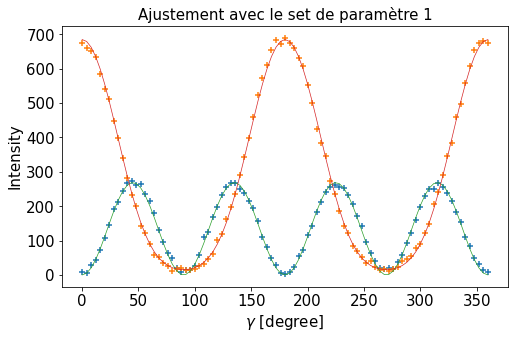

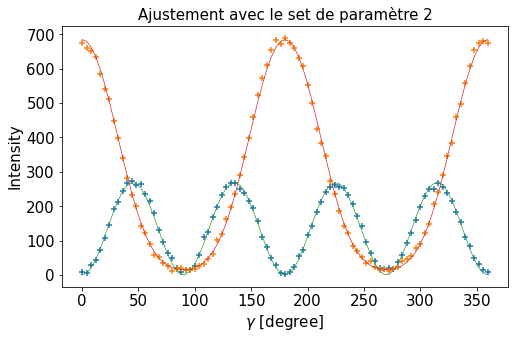

In [8]:
L_angles_rad = [i*np.pi/180 for i in L_polarisation_angle]

# Voici un moyen de fit les données expérimentales grâce aux fonctions sshg.fit_polaS et sshg.fit_polaP
# Dans l'exemple est montré que les deux sets de paramètres sont équivalents si juste la S et la P sont extraites


plt.figure(1,figsize =(8,4.8))

plt.plot(L_polarisation_angle,L_intensity_S,'+',mew=1.5)
plt.plot(L_polarisation_angle,L_intensity_P,'+',mew=1.5)
plt.plot(L_polarisation_angle,sshg.fit_polaS(L_angles_rad,chi[0],ai),lw=0.7)
plt.plot(L_polarisation_angle,sshg.fit_polaP(L_angles_rad,chi[0],chi[1],chi[2],ai),lw=0.7)

plt.xlabel(r'$\gamma$ [degree]', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(r'Intensity', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Ajustement avec le set de paramètre 1', fontsize=15)



plt.figure(2,figsize =(8,4.8))

plt.plot(L_polarisation_angle,L_intensity_S,'+',mew=1.5)
plt.plot(L_polarisation_angle,L_intensity_P,'+',mew=1.5)
plt.plot(L_polarisation_angle,sshg.fit_polaS(L_angles_rad,chi[3],ai),lw=0.7)
plt.plot(L_polarisation_angle,sshg.fit_polaP(L_angles_rad,chi[3],chi[4],chi[5],ai),lw=0.7)

plt.xlabel(r'$\gamma$ [degree]', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(r'Intensity', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Ajustement avec le set de paramètre 2', fontsize=15)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

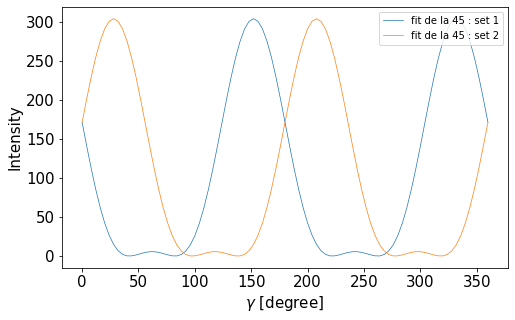

In [9]:
L_angles_rad = [i*np.pi/180 for i in L_polarisation_angle]

# On présente ici le moyen de fit la pola 45 ainsi que l'effet du set de paramètre.
# La mesure de la pola à 45 permet de distinguer entre les 2 sets.

plt.figure(2,figsize =(8,4.8))

plt.plot(L_polarisation_angle,sshg.fit_pola45(L_angles_rad,chi[0],chi[1],chi[2],ai),lw=0.7)
plt.plot(L_polarisation_angle,sshg.fit_pola45(L_angles_rad,chi[3],chi[4],chi[5],ai),lw=0.7)

plt.legend(['fit de la 45 : set 1','fit de la 45 : set 2'],loc=1)

plt.xlabel(r'$\gamma$ [degree]', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(r'Intensity', fontsize=15)
plt.yticks(fontsize=15)